# PROJECT-BI Churn

# Customer Churn Analysis
Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

Deliverables - What is expected

# Week 1


A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.


How much is churn affecting the business? How big is churn compared to the existing customer base?
Explain churn by the below categories. Are there any factors that combine to be especially impactful?
Customer demographics like age and gender
Services used
Billing information
What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?


### By DALCIDE Shelsy

# Data
# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from math import pi


import warnings
warnings.filterwarnings("ignore")

In [2]:
url="Dataset/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (2).csv"
df_bi = pd.read_csv(url)

In [3]:
df_bi.shape

(7043, 21)

In [4]:
df_bi.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
colss = df_bi.columns[8:]
colss[7043:7043]

Index([], dtype='object')

In [6]:
df_bi.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df_bi.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_bi['TotalCharges'] = pd.to_numeric(df_bi['TotalCharges'],errors='coerce')

In [9]:
df_bi.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df_bi.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df_bi.dropna(subset= ["TotalCharges"],inplace=True,axis=0)

In [12]:
df_bi["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
df_bi['TotalCharges'] = pd.to_numeric(df_bi['TotalCharges'],errors='coerce')

In [14]:
df_bi.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df_bi.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df_bi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [17]:
df_bi.mean()

SeniorCitizen        0.162400
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64

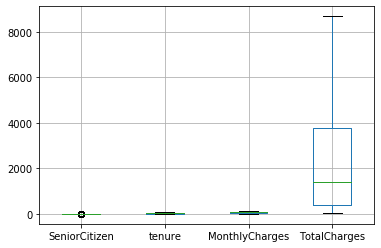

In [18]:
df_bi.boxplot()

# 1. 
# The churn of the customer  affect the business cause there's 1869 of customers are churn
# Here you can see how many customers who have churned

# We can see that there are about 5174 people who who have not Churn

In [19]:
#let's count the number of people churn or not
data_churn = df_bi['Churn']
data_count = data_churn.value_counts()
data_f = data_count.to_frame()
data_f


,Churn
No,5163
Yes,1869


# How big is churn compared to the existing customer base?

# Let's see  what percentage of clients are Churn or Not

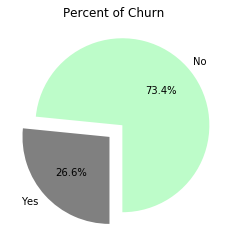

In [20]:
# How much is churn affecting the business
# Data to plot
sizes = df_bi['Churn'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of Churn ')
plt.show()

# The amount of churn customers is 26.5% and 73.5% are still our customers

# 2. Explain churn by the below categories.

In [21]:
age_gender= df_bi.groupby(['SeniorCitizen','gender','Churn']).size().to_frame()
age_gender

0
SeniorCitizen gender Churn      
0             Female No     2216
                     Yes     699
              Male   No     2281
                     Yes     694
1             Female No      328
                     Yes     240
              Male   No      338
                     Yes     236

### """Let's Change our categorical value to numerical value"""

## """ Here we replace all categorical value in the column Churn to numerical value """

In [22]:
#we count the value for the columns Churn
churn0=df_bi['Churn']
count_churn0=churn0.value_counts()
table_churn0= count_churn0.to_frame()
table_churn0

,Churn
No,5163
Yes,1869


## """ Here we replace all categorical value in the column Gender to numerical value """

In [23]:
#we count the value for the columns Gender
gend=df_bi['gender']
count_gend=gend.value_counts()
table_gend= count_gend.to_frame()
table_gend

,gender
Male,3549
Female,3483


 ## """ Here we replace all categorical value in the column Partner to numerical value """

In [24]:
#we count the value for the columns Partner
part=df_bi['Partner']
count_partner=part.value_counts()
table_part = count_partner.to_frame()
table_part

,Partner
No,3639
Yes,3393


# """ Here we replace all categorical value in the column InternetService to numerical value """

In [25]:
#we count the value for the columns InternetService
int_serv=df_bi['InternetService']
count_intserv=int_serv .value_counts()
table_intserv = count_intserv.to_frame()
table_intserv

,InternetService
Fiber optic,3096
DSL,2416
No,1520


## """ Here we replace all categorical value in the column Dependents  to numerical value """

In [26]:
#we count the value for the columns InternetService
dependent=df_bi['Dependents']
dep= dependent.value_counts()
table_dependents = dep.to_frame()
table_dependents

,Dependents
No,4933
Yes,2099


## """ Here we replace all categorical value in the column PhoneService  to numerical value """

In [27]:
#we count the value for the columns PhoneService
phoneserv=df_bi['PhoneService']
count_phoneserv= phoneserv.value_counts()
table_phoneserv = count_phoneserv.to_frame()
table_phoneserv

,PhoneService
Yes,6352
No,680


## """ Here we replace all categorical value in the column MultipleLines  to numerical value """

In [28]:
#we count the value for the columns MultipleLines
multpline=df_bi['MultipleLines']
count_multpline= multpline.value_counts()
table_multpline = count_multpline.to_frame()
table_multpline

,MultipleLines
No,3385
Yes,2967
No phone service,680


### """ Here we replace all categorical value in the column OnelineSecurity  to numerical value """¶

In [29]:
#we count the value for the columns OnlineSecurity
onlinesecu=df_bi['OnlineSecurity']
count_onlinesecu= onlinesecu.value_counts()
table_onlinesecu = count_onlinesecu.to_frame()
table_onlinesecu

,OnlineSecurity
No,3497
Yes,2015
No internet service,1520


### we count the value for the columns OnlineSecurity

In [30]:
#we count the value for the columns OnlineSecurity
onlinebac=df_bi['OnlineBackup']
count_onlinebac= onlinebac.value_counts()
table_onlinebac = count_onlinebac.to_frame()
table_onlinebac

,OnlineBackup
No,3087
Yes,2425
No internet service,1520


### """ Here we replace all categorical value in the column Deviceprotection to numerical value """

In [31]:
#we count the value for the columns OnlineSecurity
dp=df_bi['DeviceProtection']
count_dp= dp.value_counts()
table_dp = count_dp.to_frame()
table_dp

,DeviceProtection
No,3094
Yes,2418
No internet service,1520


### """ Here we replace all categorical value in the column TechSupport to numerical value """

In [32]:
#we count the value for the columns OnlineSecurity
tech =df_bi['TechSupport']
count_tech= tech.value_counts()
table_tech = count_tech.to_frame()
table_tech

,TechSupport
No,3472
Yes,2040
No internet service,1520


 ### From sklearn.preprocessing import LabelEncoder

# Here we can see how many men are churn and we can see the men who churn and those who don't, including the women.

# Here we can see the customers who Churn by age at the next you'll see the chart

In [33]:
df_bi[['SeniorCitizen','Churn']].groupby(['Churn','SeniorCitizen']).size()/df_bi.Churn.count()

Churn  SeniorCitizen
No     0                0.639505
       1                0.094710
Yes    0                0.198094
       1                0.067691
dtype: float64

# Customer demographics like age and gender

# Customer who Churn and who don't Churn by Gender 

Text(0.5, 1.0, 'Customer demographics Churn by gender')

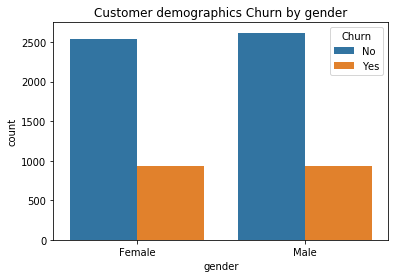

In [34]:
ax = sns.countplot(x="gender", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by gender")

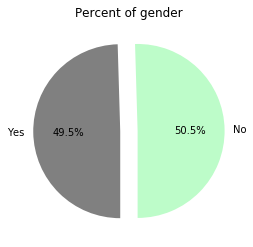

In [35]:

sizes = df_bi['gender'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of gender')
plt.show()

# Customer who Churn and who don't Churn by Age 

Text(0.5, 1.0, 'Customer demographics Churn by age')

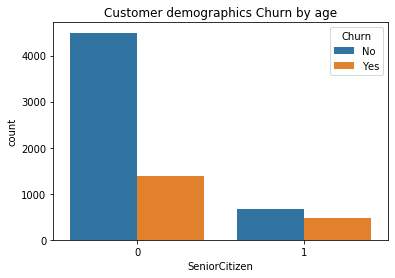

In [36]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by age")


# We gouping all our Service

In [37]:
services= df_bi.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']).size().to_frame()
services

0
PhoneService MultipleLines    InternetService OnlineSecurity      DeviceProtection    TechSupport         StreamingTV         StreamingMovies     PaperlessBilling PaymentMethod             Churn    
No           No phone service DSL             No                  No                  No                  No                  No                  No               Bank transfer (automatic) No      3
                                                                                                                                                                                             Yes     4
                                                                                                                                                                   Credit card (automatic)   No      6
                                                                                                                                                                   Electronic check          No      8
                                                                                                                                                                                             Yes    10
...                                                                                                                                                                                                 ..
Yes          Yes              No              No internet service No internet service No internet service No internet service No internet service Yes              Credit card (automatic)   No     36
                                                                                                                                                                                             Yes     2
                                                                                                                                                                   Electronic check          No     12
                                                                                                                                                                   Mailed check              No     30
                                                                                                                                                                                             Yes     2

[1505 rows x 1 columns]

# Services used by Customers who's Churn and who's not Churn

# Count all customers who's Churn or not  use PhoneService

Text(0.5, 1.0, 'Customer demographics Churn by PhoneService ')

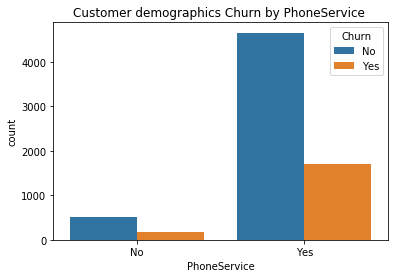

In [38]:
ax = sns.countplot(x="PhoneService", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PhoneService ")

# Count all customers who's Churn or not  use InternetService

Text(0.5, 1.0, 'Customer demographics  InternetService in relation to Churn or not Churn')

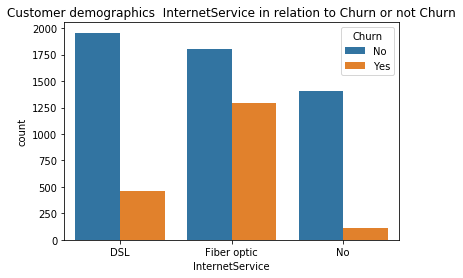

In [39]:
ax = sns.countplot(x="InternetService", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  InternetService in relation to Churn or not Churn")

# Count all customers who's Churn or not  use StreamingTV

Text(0.5, 1.0, 'Customer demographics StreamingTV in relation to Churn or not Churn')

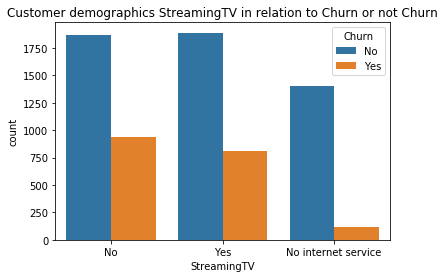

In [40]:
ax = sns.countplot(x="StreamingTV", hue="Churn", data=df_bi)
ax.set_title("Customer demographics StreamingTV in relation to Churn or not Churn")

# Count all customers who's Churn or not  use StreamingMovies

Text(0.5, 1.0, 'Customer demographics StreamingMovies in relation to Churn or not Churn')

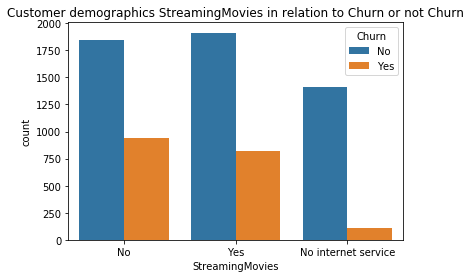

In [41]:
ax = sns.countplot(x="StreamingMovies", hue="Churn", data=df_bi)
ax.set_title("Customer demographics StreamingMovies in relation to Churn or not Churn")

# Count all customers who's Churn or not  use OnlineSecurity

Text(0.5, 1.0, 'Customer demographics  OnlineSecurity in relation to Churn or not Churn')

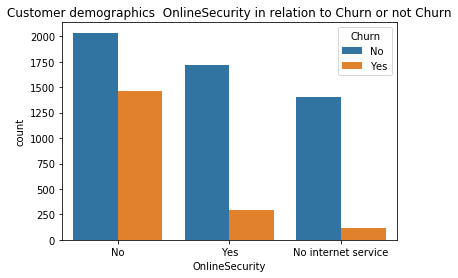

In [42]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  OnlineSecurity in relation to Churn or not Churn")

# Count all customers who's Churn or not  use OnlineBackup

Text(0.5, 1.0, 'Customer demographics OnlineBackup in relation to Churn ')

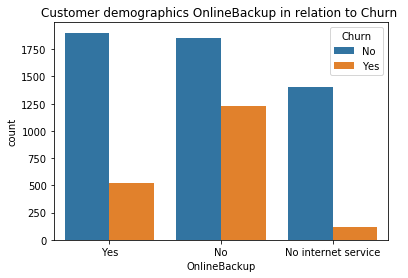

In [43]:
ax = sns.countplot(x="OnlineBackup", hue="Churn", data=df_bi)
ax.set_title("Customer demographics OnlineBackup in relation to Churn ")

# Count all customers who's Churn or not  use TechSupport

Text(0.5, 1.0, 'Customer demographics  TechSupport in relation to Churn or not Churn')

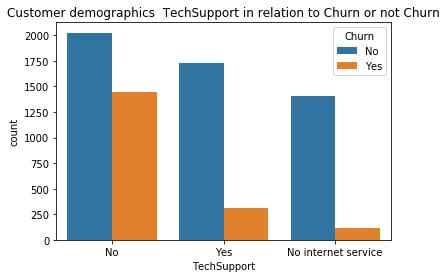

In [44]:
ax = sns.countplot(x="TechSupport", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  TechSupport in relation to Churn or not Churn")

# Count all customers who's Churn or not  use MultipleLines

Text(0.5, 1.0, 'Customer demographics MultipleLines in relation to Churn or not Churn')

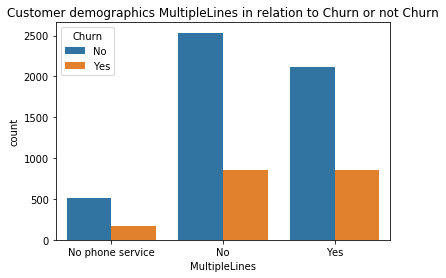

In [45]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df_bi)
ax.set_title("Customer demographics MultipleLines in relation to Churn or not Churn")

# Count all customers who's Churn or not  use DeviceProtection

Text(0.5, 1.0, 'Customer demographics  DeviceProtection in relation to Churn or not Churn')

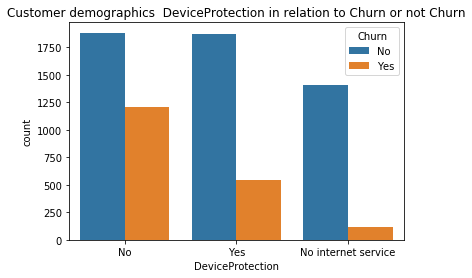

In [46]:
ax = sns.countplot(x="DeviceProtection", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  DeviceProtection in relation to Churn or not Churn")

# Billing information
# The Churn Billing the compagny let's see by the information that we received by the company

In [47]:
df_bi['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


In [48]:
df_bi['PaymentMethod'].describe().to_frame()

,PaymentMethod
count,7032
unique,4
top,Electronic check
freq,2365


# c) Billing Information 

Text(0.5, 1.0, 'Customer demographics Churn by PaymentMethod ')

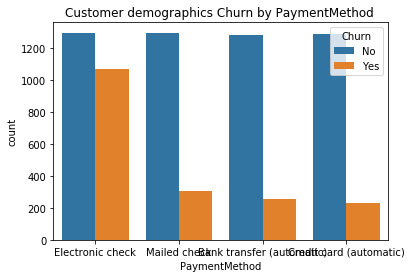

In [49]:
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PaymentMethod ")

Text(0.5, 1.0, 'Customer demographics Churn by PaperlessBilling ')

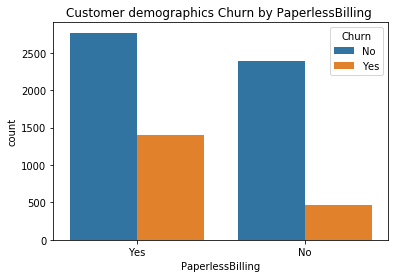

In [50]:
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PaperlessBilling ")

## Let's see the monthly income of the comagny by Churn

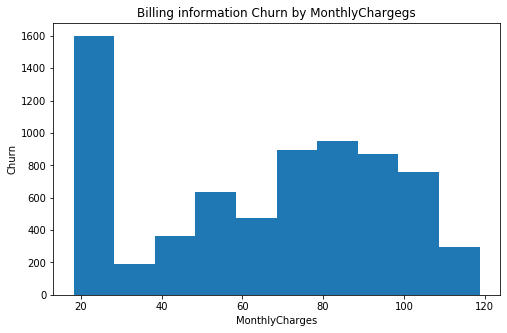

In [51]:
df_bi['MonthlyCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by MonthlyChargegs') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('MonthlyCharges') # add x-label

plt.show()

In [52]:
totalmonth = df_bi[['MonthlyCharges','Churn']]
totalmonthly = totalmonth.groupby(['Churn']).sum()
a = totalmonthly/totalmonth.sum()
round(100 * a,2)

,Churn,MonthlyCharges
Churn,,
No,NaN,69.47
Yes,NaN,30.53


### Percent of loss of profit caused by the Churn in within months

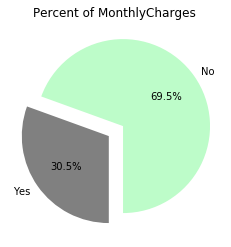

In [53]:
sizes = (69.47,30.53)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of MonthlyCharges ')
plt.show()

### The Churn affect the business by a 30.5% loss of total per month

In [54]:
df_bi['tenure'].describe().to_frame()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


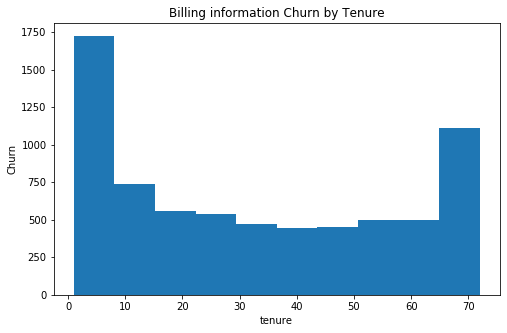

In [55]:
df_bi['tenure'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by Tenure') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('tenure') # add x-label

plt.show()

In [56]:
df_bi['TotalCharges'].describe().to_frame()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


## We can see the Total revenue of the comagny by Churn

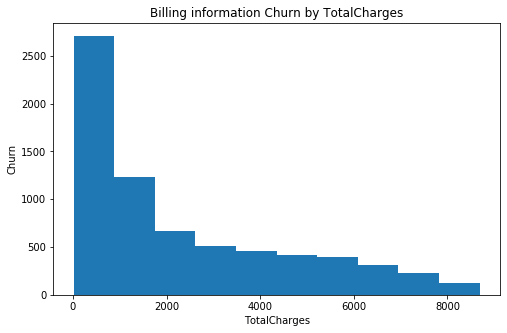

In [57]:
df_bi['TotalCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by TotalCharges') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('TotalCharges') # add x-label

plt.show()

In [58]:
totalch = df_bi[['TotalCharges','Churn']]
totalcha = totalch.groupby(['Churn']).sum()
a = totalcha/totalch.sum()
round(100 * a,2)

,Churn,TotalCharges
Churn,,
No,NaN,82.17
Yes,NaN,17.83


### Percent of loss of profit caused by the Total Churn

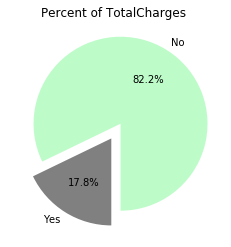

In [59]:
sizes = (82.17,17.83)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of TotalCharges ')
plt.show()

### The Churn affect the business by a 17.8% loss of total revenue

# 3.  Services are typically purchased by customers who churned

In [60]:
cols = df_bi.columns
cols = list(cols)
display(cols)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [61]:
services_1= df_bi.groupby('Churn').mean()
services_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128995,37.650010,61.307408,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


In [62]:
val = df_bi[df_bi.Churn=='Yes']
val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [63]:
val1 = df_bi[df_bi.Churn=='No']
val1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### The Percent of gender who Churn 

Female    939
Male      930
Name: gender, dtype: int64


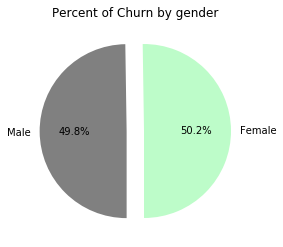

In [64]:
sizes = val['gender'].value_counts(sort = True)
print(sizes)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['Female','Male']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percent of Churn by gender')
plt.show()

### We can see thst there's mor women who churn than men

## In these these table there's some service we can see how many people has churn in each services

In [65]:
service1= val.groupby(['PhoneService']).size().to_frame()
service1

,0
PhoneService,
No,170
Yes,1699


In [66]:
service2= val.groupby(['MultipleLines']).size().to_frame()
service2

,0
MultipleLines,
No,849
No phone service,170
Yes,850


In [67]:
service3= val.groupby(['InternetService']).size().to_frame()
service3

,0
InternetService,
DSL,459
Fiber optic,1297
No,113


In [68]:
service4= val.groupby(['OnlineSecurity']).size().to_frame()
service4

,0
OnlineSecurity,
No,1461
No internet service,113
Yes,295


In [69]:
service5= val.groupby(['DeviceProtection']).size().to_frame()
service5

,0
DeviceProtection,
No,1211
No internet service,113
Yes,545


In [70]:
service6= val.groupby(['TechSupport']).size().to_frame()
service6

,0
TechSupport,
No,1446
No internet service,113
Yes,310


In [71]:
service7= val.groupby(['StreamingTV']).size().to_frame()
service7

,0
StreamingTV,
No,942
No internet service,113
Yes,814


In [72]:
service8= val.groupby(['StreamingTV']).size().to_frame()
service8

,0
StreamingTV,
No,942
No internet service,113
Yes,814


## Profile

In [73]:
df_bi.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [74]:
num = val[['tenure','MonthlyCharges','TotalCharges','Churn']]
num

,tenure,MonthlyCharges,TotalCharges,Churn
2,2,53.85,108.15,Yes
4,2,70.70,151.65,Yes
5,8,99.65,820.50,Yes
8,28,104.80,3046.05,Yes
13,49,103.70,5036.30,Yes
...,...,...,...,...
7021,12,59.80,727.80,Yes
7026,9,44.20,403.35,Yes
7032,1,75.75,75.75,Yes
7034,67,102.95,6886.25,Yes


In [75]:
profil =val[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
dumm_prof = pd.get_dummies(profil[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

In [76]:
num = val[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn','gender']]
d_profil = pd.concat([dumm_prof,num],axis=1)

In [82]:
lst =list(d_profil.columns)

In [84]:
grp_profil = d_profil.groupby(['Churn','gender']).mean()
lst =list(grp_profil.columns) 

In [85]:
from sklearn import preprocessing
values = preprocessing.normalize(grp_profil )
grp_profil[lst] = values

In [86]:
grp_profil

PhoneService_No  PhoneService_Yes  MultipleLines_No  \
Churn gender                                                        
Yes   Female         0.000059          0.000634          0.000327   
      Male           0.000060          0.000556          0.000269   

              MultipleLines_No phone service  MultipleLines_Yes  \
Churn gender                                                      
Yes   Female                        0.000059           0.000307   
      Male                          0.000060           0.000287   

              InternetService_DSL  InternetService_Fiber optic  \
Churn gender                                                     
Yes   Female             0.000162                     0.000490   
      Male               0.000159                     0.000419   

              InternetService_No  OnlineSecurity_No  \
Churn gender                                          
Yes   Female            0.000041           0.000532   
      Male              0.000038           0.000490   

              OnlineSecurity_No internet service  ...  PaperlessBilling_No  \
Churn gender                                      ...                        
Yes   Female                            0.000041  ...             0.000177   
      Male                              0.000038  ...             0.000152   

              PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
Churn gender                                                                  
Yes   Female              0.000516                                 0.000100   
      Male                0.000464                                 0.000081   

              PaymentMethod_Credit card (automatic)  \
Churn gender                                          
Yes   Female                               0.000097   
      Male                                 0.000067   

              PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
Churn gender                                                               
Yes   Female                        0.000385                    0.000111   
      Male                          0.000363                    0.000105   

              SeniorCitizen    tenure  MonthlyCharges  TotalCharges  
Churn gender                                                         
Yes   Female       0.000177  0.011784        0.051844      0.998584  
      Male         0.000156  0.011668        0.045571      0.998892  

[2 rows x 39 columns]

In [87]:
grp_profil.T

Churn                                         Yes          
gender                                     Female      Male
PhoneService_No                          0.000059  0.000060
PhoneService_Yes                         0.000634  0.000556
MultipleLines_No                         0.000327  0.000269
MultipleLines_No phone service           0.000059  0.000060
MultipleLines_Yes                        0.000307  0.000287
InternetService_DSL                      0.000162  0.000159
InternetService_Fiber optic              0.000490  0.000419
InternetService_No                       0.000041  0.000038
OnlineSecurity_No                        0.000532  0.000490
OnlineSecurity_No internet service       0.000041  0.000038
OnlineSecurity_Yes                       0.000120  0.000088
OnlineBackup_No                          0.000456  0.000407
OnlineBackup_No internet service         0.000041  0.000038
OnlineBackup_Yes                         0.000196  0.000171
DeviceProtection_No                      0.000455  0.000394
DeviceProtection_No internet service     0.000041  0.000038
DeviceProtection_Yes                     0.000197  0.000184
TechSupport_No                           0.000530  0.000482
TechSupport_No internet service          0.000041  0.000038
TechSupport_Yes                          0.000122  0.000096
StreamingTV_No                           0.000355  0.000305
StreamingTV_No internet service          0.000041  0.000038
StreamingTV_Yes                          0.000297  0.000273
StreamingMovies_No                       0.000351  0.000306
StreamingMovies_No internet service      0.000041  0.000038
StreamingMovies_Yes                      0.000300  0.000272
Contract_Month-to-month                  0.000621  0.000538
Contract_One year                        0.000055  0.000060
Contract_Two year                        0.000016  0.000017
PaperlessBilling_No                      0.000177  0.000152
PaperlessBilling_Yes                     0.000516  0.000464
PaymentMethod_Bank transfer (automatic)  0.000100  0.000081
PaymentMethod_Credit card (automatic)    0.000097  0.000067
PaymentMethod_Electronic check           0.000385  0.000363
PaymentMethod_Mailed check               0.000111  0.000105
SeniorCitizen                            0.000177  0.000156
tenure                                   0.011784  0.011668
MonthlyCharges                           0.051844  0.045571
TotalCharges                             0.998584  0.998892

In [ ]:
!

In [ ]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['tenure','MonthlyCharges','TotalCharges'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_bi)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Let's see who Churn in all service by gender and SeniorCitizen

In [ ]:
service= pd.pivot_table(val,index ='MultipleLines',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='InternetService',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='OnlineSecurity',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='DeviceProtection',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='TechSupport',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='StreamingMovies',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
service= pd.pivot_table(val,index ='StreamingTV',columns = ['gender','SeniorCitizen'] ,aggfunc ='count',values ='customerID')
service

In [ ]:
val1 = df_bi[df_bi.Churn=='No']
val1

In [ ]:
y_df = df_bi['TotalCharges'].to_frame()
y_df

# Percent of customer churn used phone service

In [ ]:
# percent of customer churn used phone service
sizes = val['PhoneService'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of PhoneService ')
plt.show()

# Quantity Churn who's use some service 

In [ ]:
#gender who's use phone service 
ax = sns.countplot(x="PhoneService",data=val)
ax.set_title("Customer demographics PhoneService ")

In [ ]:
service1= val.groupby(['MultipleLines','gender']).size().to_frame()
service1

In [ ]:
#churn who's used MultipleLines 
ax = sns.countplot(x="MultipleLines",data=val)
ax.set_title("Customer demographics MultipleLines use it and left ")

In [ ]:
ax = sns.countplot(x="InternetService",data=val)
ax.set_title("Customer demographics InternetService by Customer who Churn only")

In [ ]:
ax = sns.countplot(x="OnlineSecurity",data=val)
ax.set_title("Customer demographics InternetService use by Customer who churn more ")

In [ ]:
ax = sns.countplot(x="DeviceProtection",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

In [ ]:
ax = sns.countplot(x="TechSupport",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

In [ ]:
ax = sns.countplot(x="StreamingTV",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

In [ ]:
ax = sns.countplot(x="StreamingMovies",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

# Let's see the correlation between our dataset

In [ ]:
# let's see the correlation between our dataset
fig, ax = plt.subplots()
sns.heatmap(df_bi.corr(), center=0, cmap='BrBG', annot=True)

# 4 BONUS !!!

In [1]:
quantity_df = 7043
churn_rate = 0.2654
day = 0

In [2]:
while quantity_df >=1:
    quantity_df = quantity_df - (quantity_df * (churn_rate))
    day +=1
    print(day)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [91]:
#sex
### Female
Qt_Female= 3488
Churn_percent1 = 0.2692
day1 = 0

while Qt_Female >=1:
    Qt_Female = Qt_Female -(Qt_Female * (Churn_percent1))
    day1 +=1
    print(day1)
    
    #sex
### Male
Qt_Male= 3555
Churn_percent2 = 0.2641
day1 = 0

while Qt_Male >=1:
    Qt_Male = Qt_Male -(Qt_Male * (Churn_percent2))
    day1 +=1
    print(day1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [92]:
# partner
### part no
Qt_part_no= 3641
Churn_percent2 = 0.4916
day1 = 0

while Qt_part_no >=1:
    Qt_part_no = Qt_part_no -(Qt_part_no * (Churn_percent2))
    day1 +=1
    print(day1)

# partner
### part yes
Qt_part_yes= 3402
Churn_percent2 = 0.2692
day1 = 0

while Qt_part_yes >=1:
    Qt_part_yes = Qt_part_yes -(Qt_part_yes * (Churn_percent2))
    day1 +=1
    print(day1)


1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


### Demographics clients who are not Dependents will only take five days to churn

In [95]:
# Dependents
### dep_yes
Qt_dep_yes= 2110
Churn_percent2 = 0.1744
day1 = 0

while Qt_dep_yes >=1:
    Qt_dep_yes = Qt_dep_yes -(Qt_dep_yes * (Churn_percent2))
    day1 +=1
    print(day1)

### dep_no
Qt_dep_no= 4933
Churn_percent2 = 0.8256
day1 = 0

while Qt_dep_no >=1:
    Qt_dep_no = Qt_dep_no -(Qt_dep_no * (Churn_percent2))
    day1 +=1
    print('Demographics clients who are not Dependents will only take five days to churn',day1)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Demographics clients who are not Dependents will only take five days to churn 1
Demographics clients who are not Dependents will only take five days to churn 2
Demographics clients who are not Dependents will only take five days to churn 3
Demographics clients who are not Dependents will only take five days to churn 4
Demographics clients who are not Dependents will only take five days to churn 5


### Demographics clients who are not Dependents will only take five days to churn

In [94]:
# SeniorCitizen
### young
Qt_young= 5902
Churn_percent2 = 0.7453
day1 = 0

while Qt_young >=1:
    Qt_young = Qt_young -(Qt_young * (Churn_percent2))
    day1 +=1
    print(day1)

# SeniorCitizen
### adult
Qt_adult= 1142
Churn_percent2 = 0.2547
day1 = 0

while Qt_adult>=1:
    Qt_adult = Qt_adult -(Qt_adult * (Churn_percent2))
    day1 +=1
    print(day1)


1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
liste = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
liste1= []
for d in liste :
    if df_bi[d].dtypes == 'object':
        liste1.append(d)
liste1

In [ ]:
dat = df_bi[liste1]
dat

In [ ]:
catego_numeric = dat.apply(LabelEncoder().fit_transform)
catego_numeric

## Here we make our Model

In [ ]:
liste = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
liste2= []
for d in liste :
    if df_bi[d].dtypes != 'object':
        liste2.append(d)
liste2

In [ ]:
dfnum = df_bi[liste2]
dfnum

In [ ]:
model=pd.concat([catego_numeric, dfnum], axis = 1) 
model

In [ ]:
y = model['Churn']
x = model[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size= 0.3,random_state=0)
print('Show the Train set :',x_train.shape, y_train.shape)
print('Show the Test set :',x_test.shape, y_test.shape)

In [ ]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

In [ ]:
predict_ = lr.predict(x_train)
predict_

In [ ]:
#predict_frame = pd.DataFrame({'predict_':predict_[:]})
#predict_frame

In [ ]:
lr.score(x_test,y_test)

In [ ]:
round(lr.score(x_test,y_test),2)